# Exploratory Data Analysis
This will show us how we can do EDA using python

## Three important steps to keep in mind
1. Understand the data
2. Clean the data
3. Find a relashionship between data


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = sns.load_dataset('titanic')
df_original = df.copy()


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [56]:
df.shape


(891, 15)

In [57]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [58]:
# mode of the data
df.mode()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df.nunique()


survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [62]:
# column names
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [63]:
# df.survived.unique()
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

# Clearning and filtering the data


In [64]:
# find missing values
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [65]:
# deck has a lot of missing values, lets drop that column as that is not necessary for our EDA
df.drop(columns=['deck'], inplace=True)


In [66]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [67]:
print('Age mean', df.age.mean())
print('Age median', df.age.median())

Age mean 29.69911764705882
Age median 28.0


In [68]:
age_median = df.age.median()
age_mean = df.age.mean()

In [69]:
df.age.std()


14.526497332334044

<AxesSubplot:>

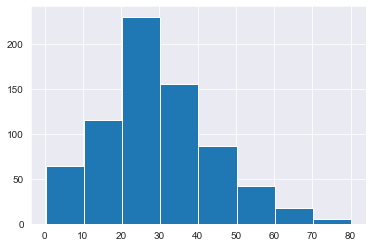

In [70]:
df.age.hist(bins=8)


In [79]:
# set the age's missing values to the average or median value, in our case, mean and median is close; so we can replace with average value as well. But let's replace missing values with median.
df.loc[pd.isna(df['age']), 'age'] = age_median

In [83]:
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [84]:
df.shape


(891, 14)

In [91]:
df.embarked.unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [101]:
# there are 3 values in embarked, lets see the mode
print(df.embarked.mode())
embarked_mode = df.embarked.mode()[0]
print(embarked_mode)

0    S
dtype: object
S


In [102]:
# this shows us that there is only one mode and that is S, so let's replace the missing values with mode value
df.loc[pd.isna(df['embarked']), 'embarked'] = embarked_mode


In [105]:
# df.loc[pd.isna(df['embarked']), 'embarked']
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [107]:
# now there is embark_town has missing values. Let's explore it
df['embark_town'].unique()


array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [108]:
# find the mode of the embark_town
df.embark_town.mode()


0    Southampton
dtype: object

In [109]:
# only one mode, lets replace missing values with mode
embark_town_mode = df.embark_town.mode()[0]
embark_town_mode


'Southampton'

In [112]:
df.loc[pd.isna(df['embark_town']), 'embark_town'] = embark_town_mode


In [113]:
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [114]:
df.shape


(891, 14)

Now data looks clean without missing values in it. We can use this data for EDA.
